In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [135]:
np.random.seed(1337)
num_points = 1000
t = np.linspace(0, 2 * np.pi, num_points)

radius = 3
circle_x = radius * np.cos(t)
circle_y = radius * np.sin(t)

basis = np.random.randn(7168, 2)
basis, _ = np.linalg.qr(basis)  # Ensure orthogonality

circle = np.column_stack([circle_x, circle_y, np.zeros((num_points, 7166))])
print("Circle shape:", circle.shape)
rotated_circle = circle[:, :2] @ basis.T
print("Rotated circle shape:", rotated_circle.shape)



Circle shape: (1000, 7168)
Rotated circle shape: (1000, 7168)


In [136]:
oscillation_params = [
    (0.8, 5), #amplitude and freq
    (0.5, 10),
    (0.3, 15),
    (0.2, 20),
    (0.1, 25),
    (0.05, 30),
    (0.02, 35),
    (0.01, 40),
]

for amp, freq in oscillation_params:
    rand_10d = np.random.randn(7168)
    #normalize
    rand_10d /= np.linalg.norm(rand_10d)
    oscillation = amp * np.sin(freq * t)
    oscillation_10d = np.outer(oscillation, rand_10d)
    rotated_circle += oscillation_10d


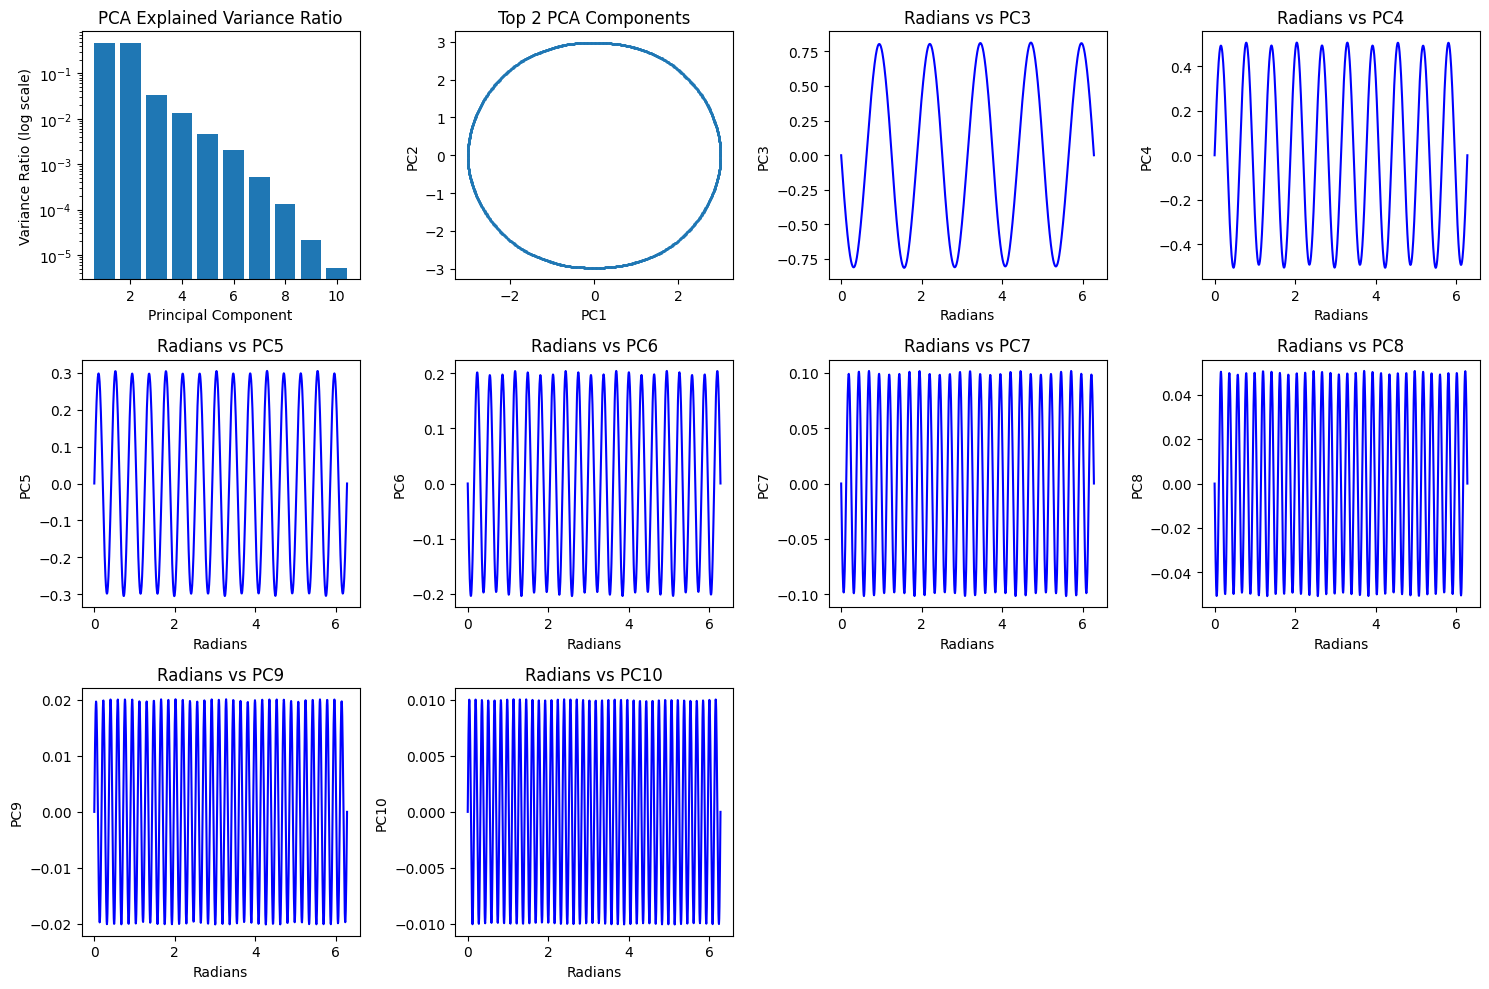

In [137]:
pca = PCA()

output_pca = pca.fit_transform(rotated_circle)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 4, 1)
ax1.bar(range(1,11), pca.explained_variance_ratio_[:10])
ax1.set_yscale('log')
ax1.set_title('PCA Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Ratio (log scale)')

ax2 = plt.subplot(3, 4, 2)
ax2.plot(output_pca[:, 0], output_pca[:, 1], 'o', markersize=1)
ax2.set_title('Top 2 PCA Components')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

for i in range(2, 10):
    ax = plt.subplot(3, 4, i + 1)
    ax.plot(t, output_pca[:, i], 'b-', markersize=1)
    ax.set_title(f'Radians vs PC{i+1}')
    ax.set_xlabel('Radians')
    ax.set_ylabel(f'PC{i+1}')

plt.tight_layout()

Text(0.5, 0, 'PC3')

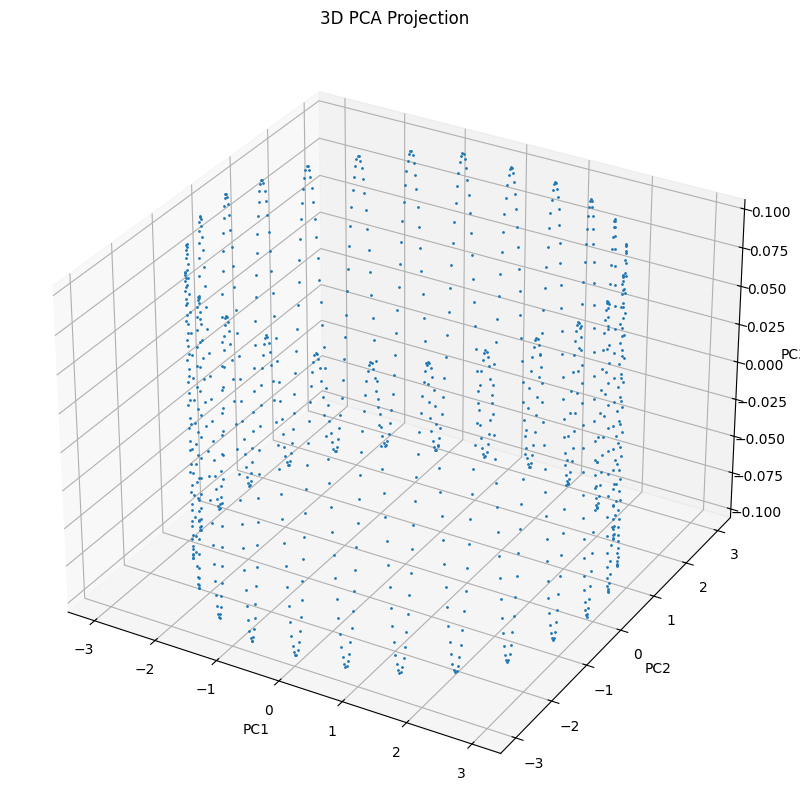

In [139]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig3d = plt.figure(figsize=(10, 10))
ax3d = fig3d.add_subplot(111, projection='3d')
ax3d.plot(output_pca[:, 0], output_pca[:, 1], output_pca[:, 6], 'o', markersize=1)
ax3d.set_title('3D PCA Projection')
ax3d.set_xlabel('PC1')
ax3d.set_ylabel('PC2')
ax3d.set_zlabel('PC3')